## Simple Natural Language Processing 
#### In this project i will using the dataset from [Kaggle:Yelp Review](https://www.kaggle.com/c/yelp-recsys-2013)
The goal is classifing the reviews to two category by using the text content for it.
* in this data each observation is areview of some business by  aprcticular user
*  "stars" feature (1-5) present review to the Business
*  "cool" -is the number of "cool" votes thise review received from other users {no limit to how many "cool" votes a review can receive}
* "useful" and "funny" columns are similar to the "cool" column.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#read the data
yelp = pd.read_csv('yelp.csv')

In [3]:
#some info about data
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
# our data look like this
yelp.head(2).transpose()

,0,1
business_id,9yKzy9PApeiPPOUJEtnvkg,ZRJwVLyzEJq1VAihDhYiow
date,2011-01-26,2011-07-27
review_id,fWKvX83p0-ka4JS3dc6E5A,IjZ33sJrzXqU-0X6U8NwyA
stars,5,5
text,My wife took me here on my birthday for breakf...,I have no idea why some people give bad review...
type,review,review
user_id,rLtl8ZkDX5vH5nAx9C3q5Q,0a2KyEL0d3Yb1V6aivbIuQ
cool,2,0
useful,5,0
funny,0,0


In [5]:
# some describing our data
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [6]:
# for our Purpose i'am add some other feature- text length of char
yelp['text length'] = yelp['text'].str.len()
yelp['text length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: text length, dtype: float64

In [7]:
# For example its look like that for some 10 char in 'text length'
yelp[yelp['text length']==10].head(2).transpose()

,2892,3854
business_id,AIaEFC65T7BKVl03INm1eg,Zw4CvOwXJj1QA85SvB99Hw
date,2010-12-20,2011-01-17
review_id,747-H8tvuxXOEMMviYBXiA,lQLprkBt4W4XbgCHGe3HqQ
stars,5,5
text,Great Job!,Awesome!!!
type,review,review
user_id,wtn-JNypbM7IupJm9t40Hw,T7QG8ge2ukcfvEosSkg8yA
cool,0,0
useful,0,0
funny,0,0


#### Now I want to do some Explore of Data by visual tools

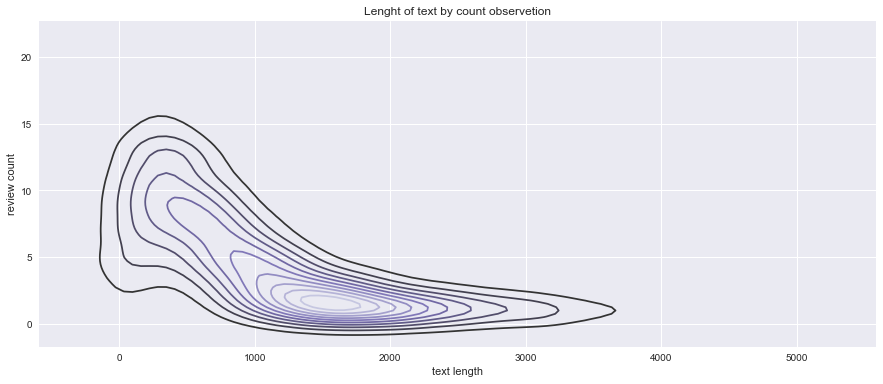

In [8]:
# some visulisation lenght of text by count observetion
plt.figure(figsize=(15,6))
sns.kdeplot(yelp.groupby('text length')['business_id'].count().reset_index(),cmap="Purples_d")
plt.xlabel('text length')
plt.ylabel('review count')
plt.title('Lenght of text by count observetion')

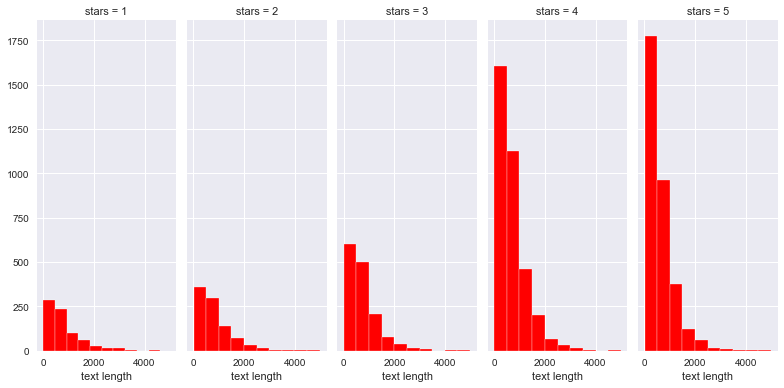

In [9]:
# checking  if "text lenght" feature can distinguish between "stars"features
g = sns.FacetGrid(yelp,col='stars',size=5.5,aspect=.4)
g.map(plt.hist,'text length',color="r",edgecolor="w")

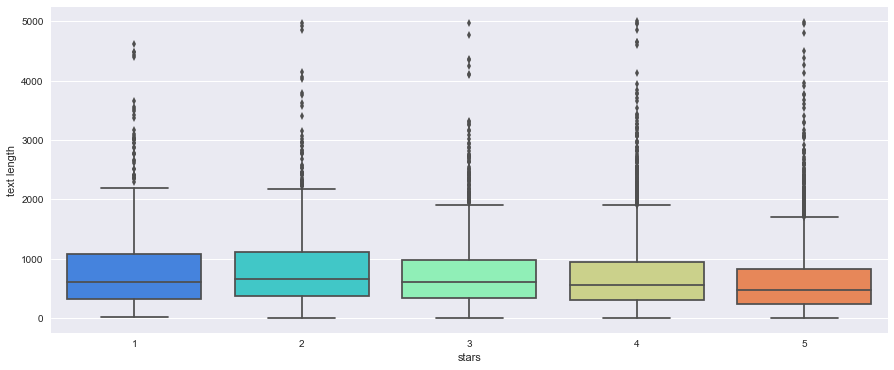

In [10]:
#by exploring this feature with other plot for better understanding
plt.figure(figsize=(15,6))
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

* Now we can see that the feature not so good for  distinguish because we have so much outliers

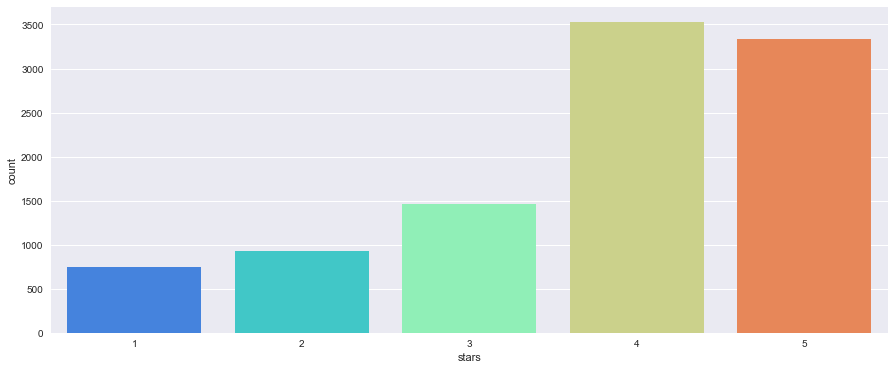

In [11]:
# for now wehave see propotion of stars in our data
plt.figure(figsize=(15,6))
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [12]:
#now is good to see the numerical value in mean term by stars
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


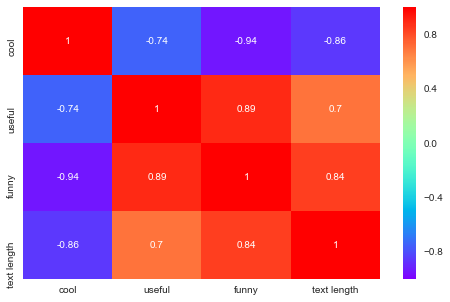

In [13]:
#we have explore corrolation between the features
plt.figure(figsize=(8,5))
sns.heatmap(stars.corr(),cmap='rainbow',annot=True)

Now that there is some understanding of what is in the data, we will begin building a model to achieve our goal

In [14]:
# Now we filtter out stars(2,3,4) from our dataset 
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
text length    4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [15]:
#now we have create two object X features and  y target
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Now we convert our data to mtrix of reviews by words with frequancy messure,somthing like that

<table border = “1“>
<tr>
<th></th> <th>Review 1</th> <th>Review 2</th> <th>...</th> <th>Review N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


In [17]:
X=cv.fit_transform(X)


In [18]:
# Print total number of vocab words, now we have  bag-of-words counts as a vector
X.shape[1] # we have 19183 uniq word 

19183

In [19]:
# split our data into training and testing data
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [21]:
#train the model 
from sklearn.naive_bayes  import MultinomialNB

In [22]:
nb=MultinomialNB()

In [23]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
predictions=nb.predict(X_test)

In [25]:
#Evaluating our model
from sklearn.metrics import confusion_matrix,classification_report

In [26]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]

             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [27]:
# So totally based only on text data  we have about 90%  accuraccy

### Now  by  using Text Processing from sklearn and pipeline

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.pipeline import Pipeline

In [29]:
pipe=Pipeline([('bag_of_words',CountVectorizer()),
               ('tf_idf',TfidfTransformer()),
               ('classifier',MultinomialNB())])

In [30]:
# Using Pipline
X=yelp_class['text']
y=yelp_class['stars']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
     ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
pipe_predictions=pipe.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pipe_predictions))
print()
print(classification_report(y_test,pipe_predictions))

[[  0 228]
 [  0 998]]

             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\dimau\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now we can see that before this dataset and this algoritm the adding of TF IDF was worset the result of very simple model
